In [111]:
import pickle
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from sktime.transformations.panel.compose import from_nested_to_2d_array
import seaborn as sns
from huforpred.forecast.metrics import rmse, mape

In [136]:
plt.rcParams["figure.figsize"] = [8, 4]

In [126]:
original_df = pd.read_parquet('data/processed/final_data.parquet')

In [36]:
forecast_forum = pd.read_pickle('with_forum.pickle')
forecast_simple = pd.read_pickle('without_forum.pickle')

In [37]:
eval_df_simple = pd.concat(
    [
        from_nested_to_2d_array(forecast_simple["y_test"])
        .iloc[:, 0]
        .rename("y_test"),
        from_nested_to_2d_array(forecast_simple["y_pred"])
        .iloc[:, 0]
        .rename("y_pred"),
        forecast_simple["test_custom_gain_function"].rename('daily_return')
    ],
    axis=1,
).set_index(original_df.iloc[15 + 252 : -1]['Date'])

eval_df_forum = pd.concat(
    [
        from_nested_to_2d_array(forecast_forum["y_test"])
        .iloc[:, 0]
        .rename("y_test"),
        from_nested_to_2d_array(forecast_forum["y_pred"])
        .iloc[:, 0]
        .rename("y_pred"),
        forecast_forum["test_custom_gain_function"].rename('daily_return')
    ],
    axis=1,
).set_index(original_df.iloc[15 + 252 : -1]['Date'])

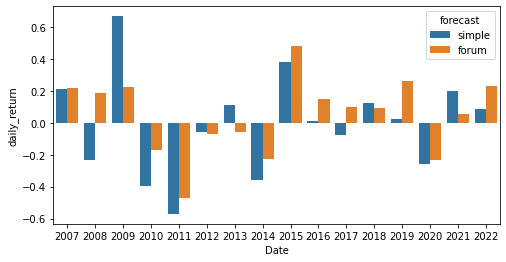

In [137]:
cum_returns = (
    pd.concat(
        [
            eval_df_simple.groupby(pd.Grouper(freq="1Y"))["daily_return"]
            .sum()
            .to_frame()
            .assign(forecast="simple"),
            eval_df_forum.groupby(pd.Grouper(freq="1Y"))["daily_return"]
            .sum()
            .to_frame()
            .assign(forecast="forum"),
        ]
    ).reset_index()
)

fig, ax = plt.subplots()
sns.barplot(data=cum_returns, x="Date", y="daily_return", hue="forecast", ax=ax)

fig.savefig('3y_return.png')

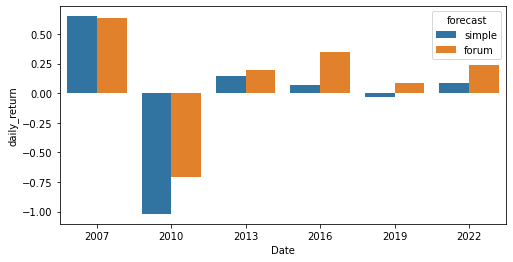

In [138]:
cum_returns = (
    pd.concat(
        [
            eval_df_simple.groupby(pd.Grouper(freq="3Y"))["daily_return"]
            .sum()
            .to_frame()
            .assign(forecast="simple"),
            eval_df_forum.groupby(pd.Grouper(freq="3Y"))["daily_return"]
            .sum()
            .to_frame()
            .assign(forecast="forum"),
        ]
    ).reset_index()
)

fig, ax = plt.subplots()
sns.barplot(data=cum_returns, x="Date", y="daily_return", hue="forecast", ax=ax)

fig.savefig('1y_return.png')

In [135]:
round(rmse(eval_df_simple['y_test'], eval_df_simple['y_pred']), 5)

0.0187

In [133]:
round(rmse(eval_df_forum['y_test'], eval_df_forum['y_pred']), 5)

0.01848

In [139]:
round(mape(eval_df_simple['y_test'], eval_df_simple['y_pred']), 5)

/homeEury/Bigdata/online_media/huforpred/venv/lib/python3.8/site-packages/sktime/performance_metrics/forecasting/_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


3.80458

In [140]:
round(mape(eval_df_forum['y_test'], eval_df_forum['y_pred']), 5)

/homeEury/Bigdata/online_media/huforpred/venv/lib/python3.8/site-packages/sktime/performance_metrics/forecasting/_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


3.81131